In [1]:
###################################################
# Author: Fernando Cardoso e Sandro Camargo
# Course: Biostatistics
# Federal University of Pampa - Bagé - PPGCAP
#
# Exercício 4 - MS x temperatura + precipitação + pragas + densidade
# Análise de Regressão Múltipla
###################################################

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

In [2]:
# === 1. Leitura dos dados ===
dados = pd.read_csv("https://raw.githubusercontent.com/Sandrocamargo/biostatistics/refs/heads/master/datasets/rl-rlm.txt", sep="\t", header=0)

In [3]:
# === 2. Modelo completo ===
modelo = smf.ols("ms ~ temp + prec + prag + dens", data=dados).fit()
print("=== Modelo completo ===")
print(modelo.summary())

anova_modelo = sm.stats.anova_lm(modelo, typ=2)
print("\n=== ANOVA do modelo completo ===")
print(anova_modelo)

=== Modelo completo ===
                            OLS Regression Results                            
Dep. Variable:                     ms   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     25.00
Date:                Tue, 21 Oct 2025   Prob (F-statistic):           1.74e-06
Time:                        14:30:58   Log-Likelihood:                 6.5199
No. Observations:                  20   AIC:                            -3.040
Df Residuals:                      15   BIC:                             1.939
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7196      0

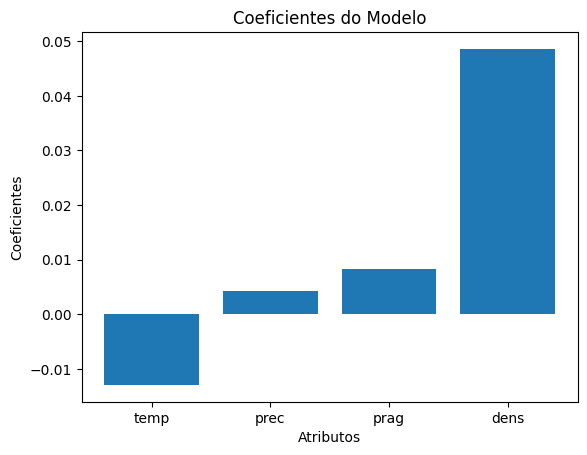

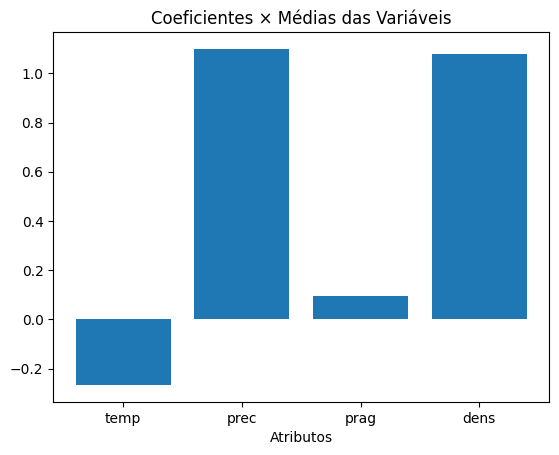

In [6]:
# === 3. Gráficos dos coeficientes ===
coefs = modelo.params[1:]  # ignora o intercepto

plt.figure()
plt.bar(coefs.index, coefs.values)
plt.title("Coeficientes do Modelo")
plt.xlabel("Atributos")
plt.ylabel("Coeficientes")
plt.savefig("mlr-coefs.pdf")
plt.show()

plt.figure()
plt.bar(coefs.index, coefs.values * dados.iloc[:, 1:5].mean().values)
plt.title("Coeficientes × Médias das Variáveis")
plt.xlabel("Atributos")
plt.savefig("mlr-coefs-aj.pdf")
plt.show()

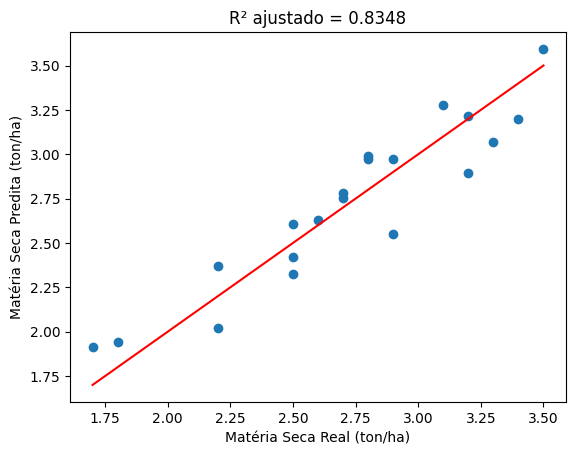

In [8]:
# === 4. Gráfico de valores reais vs preditos ===
plt.figure()
plt.scatter(dados["ms"], modelo.fittedvalues)
plt.plot([dados["ms"].min(), dados["ms"].max()],
         [dados["ms"].min(), dados["ms"].max()], color="red")
plt.xlabel("Matéria Seca Real (ton/ha)")
plt.ylabel("Matéria Seca Predita (ton/ha)")
plt.title(f"R² ajustado = {modelo.rsquared_adj:.4f}")
plt.savefig("mlr-results.pdf")
plt.show()


=== MODELO2 ===
                            OLS Regression Results                            
Dep. Variable:                     ms   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     52.82
Date:                Tue, 21 Oct 2025   Prob (F-statistic):           5.07e-08
Time:                        14:34:25   Log-Likelihood:                 5.9118
No. Observations:                  20   AIC:                            -5.824
Df Residuals:                      17   BIC:                            -2.836
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5436      0.255   

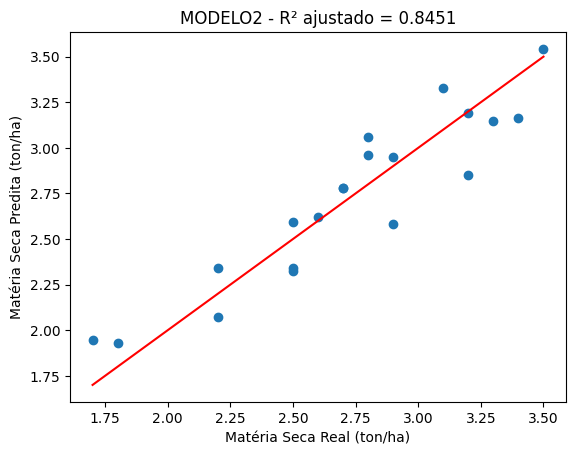


=== MODELO3 ===
                            OLS Regression Results                            
Dep. Variable:                     ms   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     13.86
Date:                Tue, 21 Oct 2025   Prob (F-statistic):           0.000103
Time:                        14:34:26   Log-Likelihood:                -1.0454
No. Observations:                  20   AIC:                             10.09
Df Residuals:                      16   BIC:                             14.07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6121      0.735   

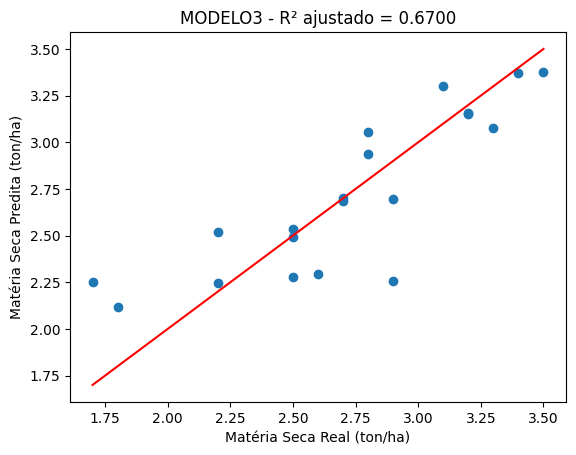


=== MODELO4 ===
                            OLS Regression Results                            
Dep. Variable:                     ms   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.092
Method:                 Least Squares   F-statistic:                    0.2007
Date:                Tue, 21 Oct 2025   Prob (F-statistic):              0.820
Time:                        14:34:26   Log-Likelihood:                -13.616
No. Observations:                  20   AIC:                             33.23
Df Residuals:                      17   BIC:                             36.22
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1865      1.258   

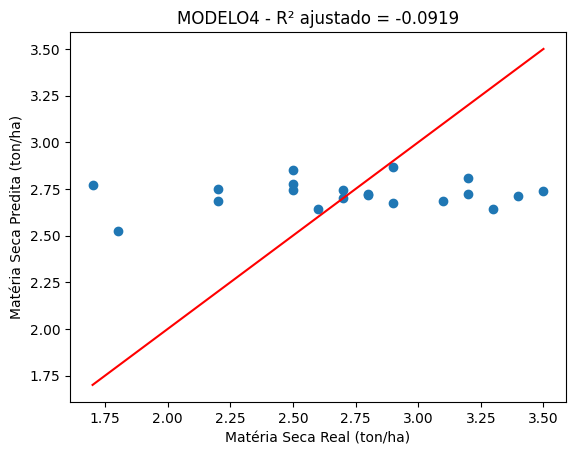

In [9]:
# === 5. Modelos reduzidos ===
modelos = {
    "modelo2": "ms ~ prec + dens",
    "modelo3": "ms ~ temp + prag + dens",
    "modelo4": "ms ~ temp + prag"
}

for nome, formula in modelos.items():
    print(f"\n=== {nome.upper()} ===")
    mod = smf.ols(formula, data=dados).fit()
    print(mod.summary())
    sm.stats.anova_lm(mod, typ=2)

    plt.scatter(dados["ms"], mod.fittedvalues)
    plt.plot([dados["ms"].min(), dados["ms"].max()],
             [dados["ms"].min(), dados["ms"].max()], color="red")
    plt.xlabel("Matéria Seca Real (ton/ha)")
    plt.ylabel("Matéria Seca Predita (ton/ha)")
    plt.title(f"{nome.upper()} - R² ajustado = {mod.rsquared_adj:.4f}")
    plt.show()

In [10]:
# === 6. Stepwise selection (forward/backward) ===
print("\n=== Seleção stepwise (grau 1) ===")

# Converte dados para formato sklearn
X = dados[["temp", "prec", "prag", "dens"]]
y = dados["ms"]

lr = LinearRegression()

# Stepwise forward e backward
sfs = SFS(lr,
          k_features="best",
          forward=True,
          floating=True,
          scoring="r2",
          cv=0)
sfs = sfs.fit(X, y)
print(f"Melhores variáveis (stepwise grau 1): {sfs.k_feature_names_}")


=== Seleção stepwise (grau 1) ===
Melhores variáveis (stepwise grau 1): ('temp', 'prec', 'prag', 'dens')


In [11]:
# === 7. Modelos com termos quadráticos, cúbicos e quárticos ===
dados["temp2"] = dados["temp"]**2
dados["prec2"] = dados["prec"]**2
dados["prag2"] = dados["prag"]**2
dados["dens2"] = dados["dens"]**2

dados["temp3"] = dados["temp"]**3
dados["prec3"] = dados["prec"]**3
dados["prag3"] = dados["prag"]**3
dados["dens3"] = dados["dens"]**3

dados["temp4"] = dados["temp"]**4
dados["prec4"] = dados["prec"]**4
dados["prag4"] = dados["prag"]**4
dados["dens4"] = dados["dens"]**4

model_formulas = [
    "ms ~ temp + prec + prag + dens + I(temp**2) + I(prec**2) + I(prag**2) + I(dens**2)",
    "ms ~ temp + prec + prag + dens + I(temp**2) + I(prec**2) + I(prag**2) + I(dens**2) + I(temp**3) + I(prec**3) + I(prag**3) + I(dens**3)",
    "ms ~ temp + prec + prag + dens + I(temp**2) + I(prec**2) + I(prag**2) + I(dens**2) + I(temp**3) + I(prec**3) + I(prag**3) + I(dens**3) + I(temp**4) + I(prec**4) + I(prag**4) + I(dens**4)"
]

for i, formula in enumerate(model_formulas, start=2):
    print(f"\n=== Stepwise grau {i} ===")
    mod = smf.ols(formula, data=dados).fit()
    print(mod.summary())

    # Seleção automática usando stepwise
    vars_ = ["temp", "prec", "prag", "dens",
             "temp2", "prec2", "prag2", "dens2",
             "temp3", "prec3", "prag3", "dens3",
             "temp4", "prec4", "prag4", "dens4"]
    vars_ = [v for v in vars_ if v in dados.columns]
    X_poly = dados[vars_]
    sfs_poly = SFS(lr, k_features="best", forward=True, floating=True, scoring="r2", cv=0)
    sfs_poly.fit(X_poly, y)
    print(f"Variáveis selecionadas (grau {i}): {sfs_poly.k_feature_names_}")



=== Stepwise grau 2 ===
                            OLS Regression Results                            
Dep. Variable:                     ms   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     17.95
Date:                Tue, 21 Oct 2025   Prob (F-statistic):           2.79e-05
Time:                        14:34:47   Log-Likelihood:                 12.579
No. Observations:                  20   AIC:                            -7.157
Df Residuals:                      11   BIC:                             1.805
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.1827